In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# DEFINING THE PATH

Path  = r'/Users/ghalebju/Desktop/Data Analysis Format/part 6/Zomato rest/Zomato Bangalore Restaurants analysis”/02 Data'

In [6]:
# IMPORTING DATA FRAME

df = pd.read_csv(os.path.join (Path,'Prepared Data' ,'Zomato_clean'))

In [7]:
df.columns

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

/var/folders/s5/185t061116b37123q55fx3hc0000gn/T/ipykernel_60128/3655175979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'], bins=25)


<Axes: xlabel='votes', ylabel='Density'>

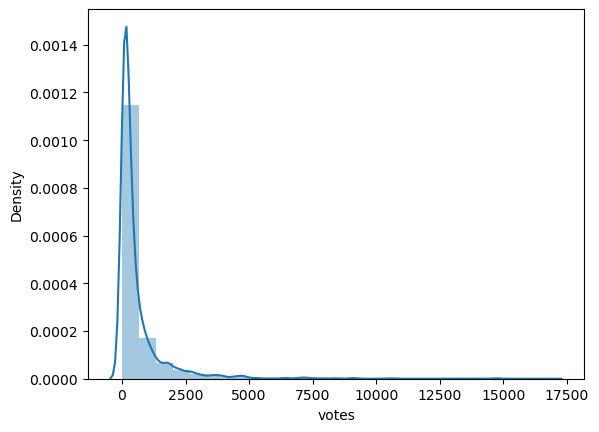

In [8]:
sns.distplot(df['votes'], bins=25)

In [9]:
df['votes'].mean() # Check the mean

601.136996937411

In [10]:
df['votes'].median() # Check the median

221.0

In [11]:
df['votes'].max() # Check the max

16832

hypothesis: "people tend to give more votes when the cost gets higher up to a point where the price factor (being very expensive) starts to affect how people votes and they tend to give lower votes"

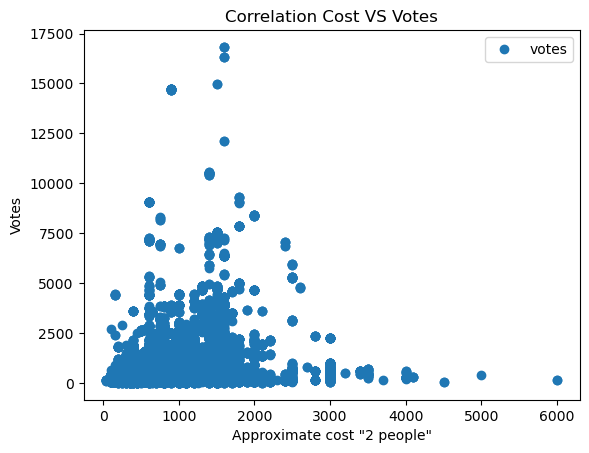

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'approx_cost(for two people)', y='votes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Correlation Cost VS Votes')  
plt.xlabel('Approximate cost "2 people"')  
plt.ylabel('Votes')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['approx_cost(for two people)'].values.reshape(-1,1)
y = df['votes'].values.reshape(-1,1)

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

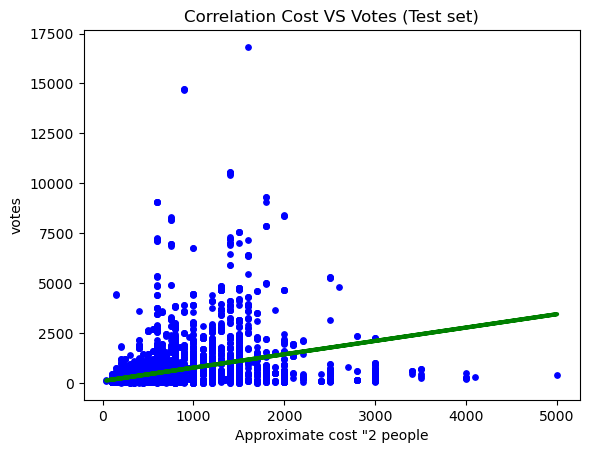

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Correlation Cost VS Votes (Test set)')
plot_test.xlabel('Approximate cost "2 people')
plot_test.ylabel('votes')
plot_test.show()

#generelly speaking, more or less the line fits the test set since we are getting a positive correlation but when comparing this with the correlation we did in the exercise 2, we see even less observations when the costs get higher and more observations when the cost is between 0 and 1000.
nevertheless, we do see how the highest number of vote are distiburted for middel prices (not very low nor very high)

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66967723]]
Mean squared error:  1111519.538445806
R2 score:  0.08877721361484547


In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,61,163.096127
1,84,263.547711
2,119,1770.321475
3,241,430.967018
4,540,631.870187
5,195,363.999295
6,540,631.870187
7,327,397.483157
8,231,363.999295
9,951,832.773355


on one hand, the summary statistics show a very high squered error which means that a regression model may not by the best model to represent the data.
on the other hand, the comparison table also proves our first observation because it is quite. clear, just by looking at the table, how different the statistic values are from the actual value 